# Computer Vision Course #02
## Image Processing
by Can Nguyen, Tuong Pham - TIC Computer Vision Team

## Imports

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load an Image with PIL
PIL stands for Pillow library in Python. This library is similar with OpenCV. To load an image, you need to provide the image path into `Image.open` function.

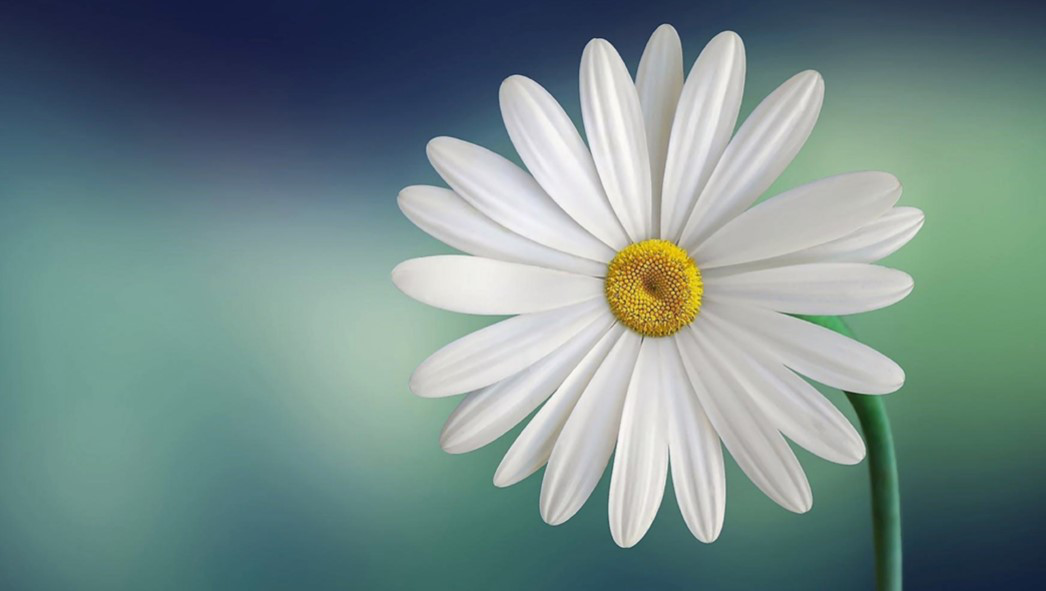

In [2]:
image = Image.open("Picture2.jpg")
display(image)
image = np.asarray(image)

# Geometry Transformation
## Point transformation

Apply transformation on a single point

In [3]:
# Perform transformation
def point_transform(x, y, matrix):
    coord = np.asarray([x, y, 1])
    
    des_coord = matrix.dot(coord)
    
    return np.asarray(des_coord, dtype=int)

## Translation

In [27]:
def translate(image, tx, ty):
    
    # Define transform matrix
    transform_matrix = np.asarray(
        [[1, 0, tx],
         [0, 1, ty]
        ]
    )
    
    # Intialize image as black
    output = np.zeros(image.shape, dtype=int)
    
    # For each pixel in image
    for w in range(image.shape[0]):
        for h in range(image.shape[1]):
            
            # Calculate destinate coordination
            des_x, des_y = point_transform(w, h, transform_matrix)
            
            # Out-of-bound condition
            valid = (des_x >= 0) & (des_x < image.shape[0]) & (des_y >= 0) & (des_y < image.shape[1])
            
            # Assigning values
            if valid:
                output[des_x, des_y, :] = image[w,h,:]
    
    return output.astype('B')

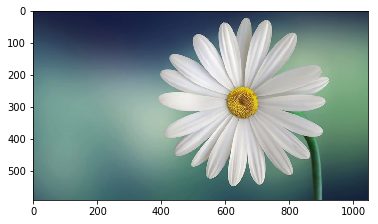

In [28]:
# Original image
plt.figure()
plt.imshow(image)

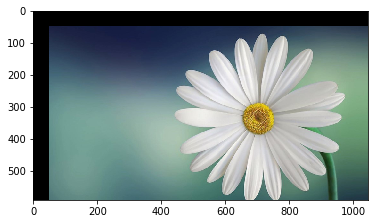

In [29]:
# # Process image
processed = translate(image, 50, 50)

# # Processed image
plt.figure()
plt.imshow(processed)

## Rotation

In [31]:
def rotate(image, theta):
    
    # Define transform matrix
    sin, cos = np.sin(theta), np.cos(theta)
    
    transform_matrix = np.asarray(
        [[cos, -sin, 0],
         [sin, cos, 0]
        ]
    )
    
    # Intialize image as black
    output = np.zeros(image.shape, dtype=int)
    
    # For each pixel in image
    for w in range(image.shape[0]):
        for h in range(image.shape[1]):
            
            # Calculate destinate coordination
            des_x, des_y = point_transform(w, h, transform_matrix)
            
            # Out-of-bound condition
            valid = (des_x >= 0) & (des_x < image.shape[0]) & (des_y >= 0) & (des_y < image.shape[1])
            
            # Assigning values
            if valid:
                output[des_x, des_y, :] = image[w,h,:]
    
    return output.astype('B')

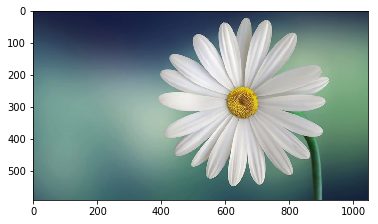

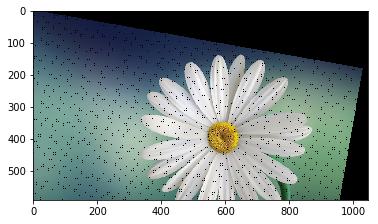

In [36]:
# Original image
plt.figure()
plt.imshow(image)

# Process image
processed = rotate(image, -10/180*np.pi)

# Processed image
plt.figure()
plt.imshow(processed)

## Rotation around abitrary point

In [37]:
def rotate_center(image, theta):
    
    # Define rotation matrix
    sin, cos = np.sin(theta), np.cos(theta)
    
    rot_matrix = np.asarray(
        [[cos, -sin, 0],
         [sin, cos, 0]
        ]
    )
    
    # Define translation matrix
    
    # Locate center point
    w_c = int(image.shape[0] / 2)
    w_h = int(image.shape[1] / 2)
    
    # Translation to origin
    mov_matrix = np.asarray(
        [[1, 0, -w_c],
         [0, 1, -w_h]
        ]
    )
    
    # Translation back
    mov_back_matrix = np.asarray(
        [[1, 0, w_c],
         [0, 1, w_h]
        ]
    )
    
    # Intialize image as black
    output = np.zeros(image.shape, dtype=int)
    
    # For each pixel in image
    for w in range(image.shape[0]):
        for h in range(image.shape[1]):
            
            # Calculate destinate coordination
            # Move to origin
            des_x, des_y = point_transform(w, h, mov_matrix)
            
            # Rotate
            des_x, des_y = point_transform(des_x, des_y, rot_matrix)
            
            # Move back
            des_x, des_y = point_transform(des_x, des_y, mov_back_matrix)
            
            # Out-of-bound condition
            valid = (des_x >= 0) & (des_x < image.shape[0]) & (des_y >= 0) & (des_y < image.shape[1])
            
            # Assigning values
            if valid:
                output[des_x, des_y, :] = image[w,h,:]
    
    return output.astype('B')

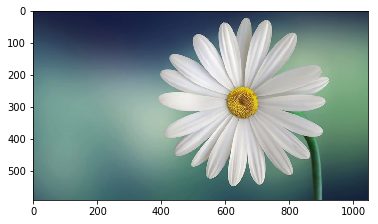

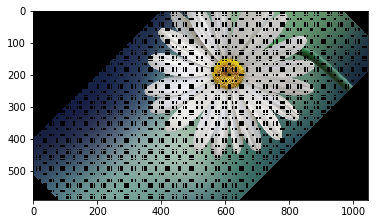

In [39]:
# Original image
plt.figure()
plt.imshow(image)

# Process image
processed = rotate_center(image, 45/180*np.pi)

# Processed image
plt.figure()
plt.imshow(processed)

# Intensity Transformation
## Histogram

In this session, we would demonstrate about how to create and display histogram of each color channel


In [41]:
def create_histogram(image, channel_index):
    # Get channel
    channel = image[:,:,channel_index]
    
    # Initialize histogram matrix
    histogram = np.zeros((256,1))
    
    # Use intensity as index
    for i in channel.ravel():
        histogram[i] += 1
        
    return histogram

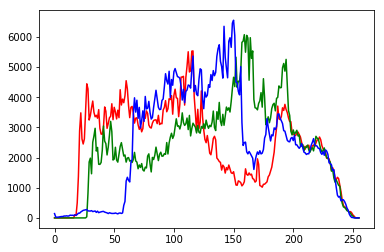

In [42]:
red = create_histogram(image, 0)
green = create_histogram(image, 1)
blue = create_histogram(image, 2)

# Double check
plt.figure()
plt.plot(red, color='red')
plt.plot(green, color='green')
plt.plot(blue, color='blue')

## Brighten/Darken an image
Describes the process of manipulating an image's brightness

In [44]:
def enhance_brightness(image, alpha):
    # Create brighter image
    output = image.copy()

    # Intensity transform matrix
    mat = np.zeros(output.shape, dtype=int) + alpha

    # Increase brightness
    output = output + mat

    # Apply thresholding
    output[output > 255] = 255
    output[output < 0] = 0
    
    return output.astype('B')

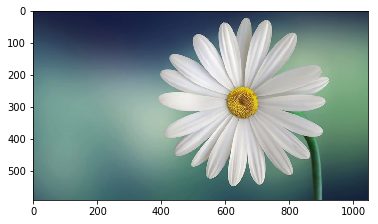

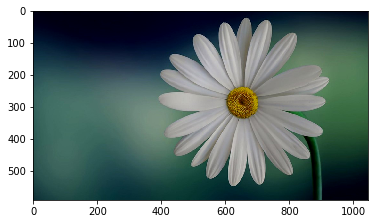

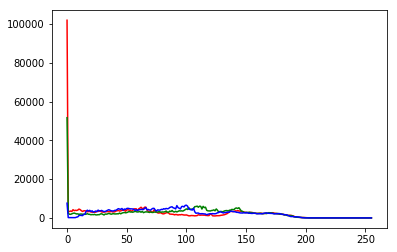

In [45]:
# Original image
plt.figure()
plt.imshow(image)

# Process image
processed = enhance_brightness(image, -50)

# Processed image
plt.figure()
plt.imshow(processed)

# Display histogram
red = create_histogram(processed, 0)
green = create_histogram(processed, 1)
blue = create_histogram(processed, 2)

# Double check
plt.figure()
plt.plot(red, color='red')
plt.plot(green, color='green')
plt.plot(blue, color='blue')

darker = processed.copy()

## Improve image's contrast
The session illustrates the process of enhancing image's contrast, typically by stretching the histogram

In [46]:
def enhance_contrast(image):
    # Create brighter image
    output = image.copy()
    
    # For each color channel
    for i in range(image.shape[2]):
        channel = image[:,:,i]
        
        # Get minimum and maximum values
        i_min = np.min(channel.ravel())
        i_max = np.max(channel.ravel())
        
        # Stretch histogram        
        output[:,:,i] = (output[:,:,i] - i_min) / (i_max - i_min) * 255
        
    return output.astype('B')

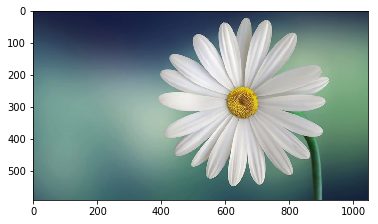

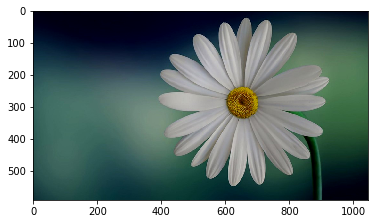

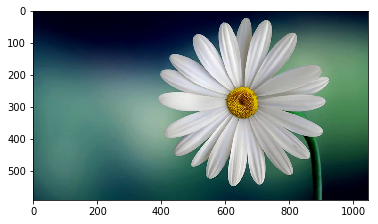

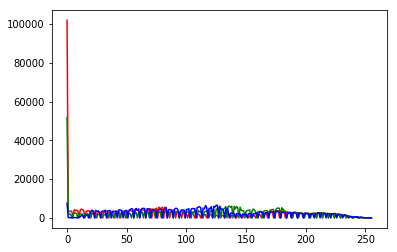

In [47]:
# Original image
plt.figure()
plt.imshow(image)

# Darker
plt.figure()
plt.imshow(darker)

# Process image
processed = enhance_contrast(darker)

# Processed image
plt.figure()
plt.imshow(processed)

# Display histogram
red = create_histogram(processed, 0)
green = create_histogram(processed, 1)
blue = create_histogram(processed, 2)

# Double check
plt.figure()
plt.plot(red, color='red')
plt.plot(green, color='green')
plt.plot(blue, color='blue')

# Filter

## Salt and pepper

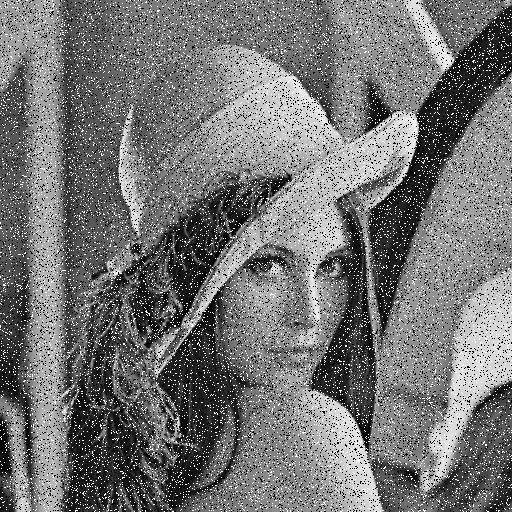

In [50]:
image = Image.open("lena_sp_noise.png")
display(image)

image = np.asarray(image)

## Denoising with Mean filter

In [53]:
def denoise(image, size):
    output = image.copy()
    
    # For each VALID pixel in image
    for r in range(size, image.shape[0] - size):
        for c in range(size, image.shape[1] - size):
            
            # Extract the convolution block
            convo = image[r - size : r + size + 1, c - size : c + size + 1]
            
            # Get the mean
            mean = np.median(convo)
            
            # Assign new value
            output[r, c] = np.round(mean)
            
    return output.astype('B')

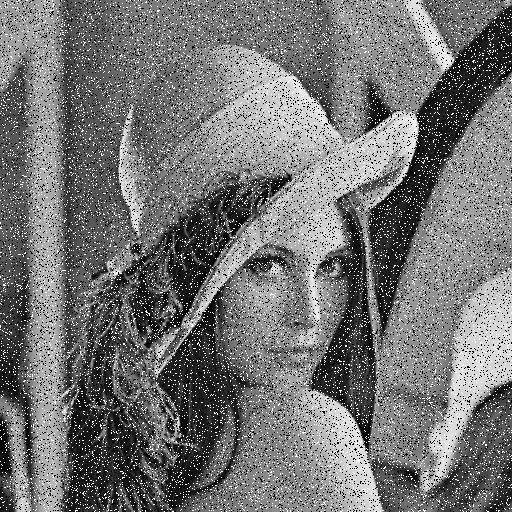

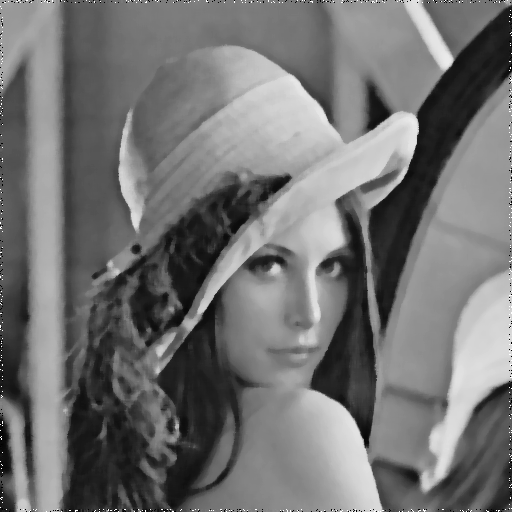

In [54]:
# Original image
display(Image.fromarray(image))

# Process image
processed = denoise(image, 3)

# Processed image
display(Image.fromarray(processed))

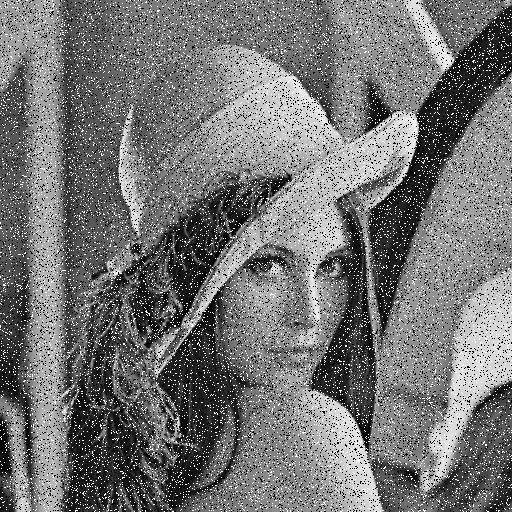

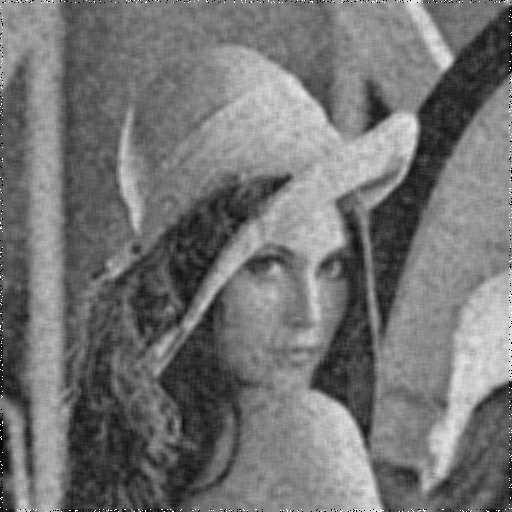

In [55]:
def denoise(image, size):
    output = image.copy()
    
    # For each VALID pixel in image
    for r in range(size, image.shape[0] - size):
        for c in range(size, image.shape[1] - size):
            
            # Extract the convolution block
            convo = image[r - size : r + size + 1, c - size : c + size + 1]
            
            # Get the mean
            mean = np.mean(convo)
            
            # Assign new value
            output[r, c] = np.round(mean)
            
    return output.astype('B')

# Original image
display(Image.fromarray(image))

# Process image
processed = denoise(image, 3)

# Processed image
display(Image.fromarray(processed))